In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers

In [8]:
data_train_path='Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/test'
data_val_path='Fruits_Vegetables/validation'

In [9]:
img_width=180
img_height=180

In [10]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [11]:
data_cat=data_train.class_names

In [76]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [12]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [13]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


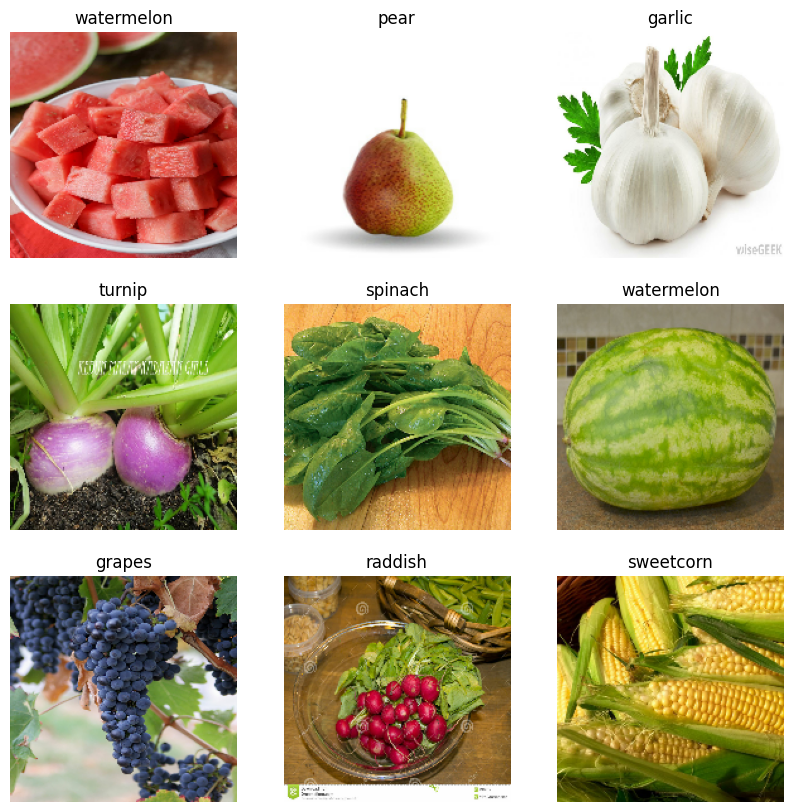

In [21]:
# print the trian data set

plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [31]:
from tensorflow.keras.models import Sequential

In [24]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [46]:
#  Now Built a sequisial Model 

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')
])

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(form_logits=True),metrics=['accuracy'])

In [47]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [50]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/25


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.0496 - loss: 3.5978 - val_accuracy: 0.1616 - val_loss: 2.8864
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 248ms/step - accuracy: 0.1639 - loss: 2.9580 - val_accuracy: 0.4457 - val_loss: 1.9429
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 25s 253ms/step - accuracy: 0.3083 - loss: 2.3254 - val_accuracy: 0.5710 - val_loss: 1.4671
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.4445 - loss: 1.8731 - val_accuracy: 0.7131 - val_loss: 1.0695
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.5951 - loss: 1.3531 - val_accuracy: 0.8524 - val_loss: 0.6204
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - accuracy: 0.7554 - loss: 0.8509 - val_accuracy: 0.8997 - val_loss: 0.4637
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 269ms/step - accuracy: 0.8399 - loss: 0.5103 - val_accuracy: 0.9164 - val_loss: 0.4238
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 264ms/step - accuracy: 0.9080 - loss: 0.3291 - val_accuracy: 0.947

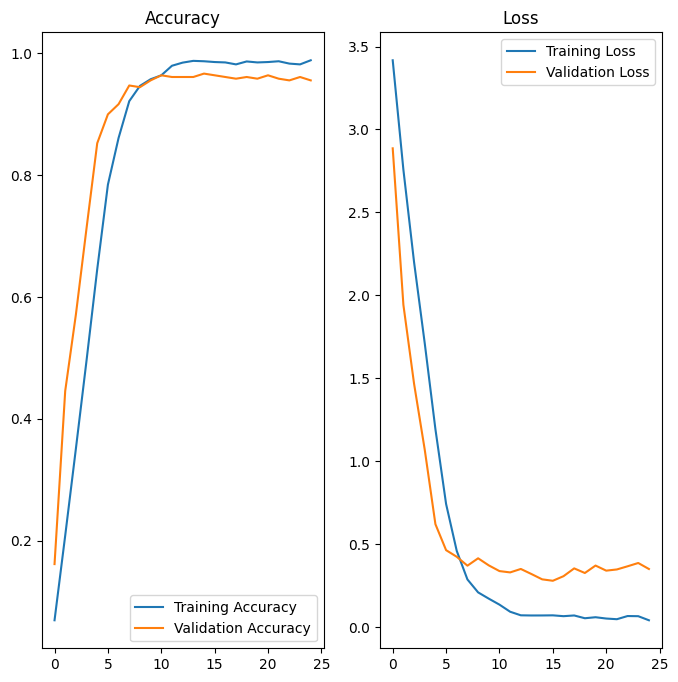

In [54]:
epochs_range = range(epochs_size)

plt.figure(figsize=(8, 8))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


# plt.subplot(1,2,2)
# plt.plot(epochs_range.history(['accuracy']),labels='Training Accuracy')
# plt.plot(epochs_range.history(['val_accuracy']),labels='Validation Accuracy')
# plt.title('Accuray')

In [71]:
image='Apple (2).jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


In [72]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [73]:
score=tf.nn.softmax(predict)

In [74]:
# print('vag/Fruit in image is {} wiht accuracy of { :.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))
print('Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Fruit in image is apple with accuracy of 7.21


In [75]:
model.save('Image_classify.keras')